# PROJET INGE 2 : 
# Computer Vision pour la lecture automatique de factures
### Encadrant : Wajd MESKINI
### Etudiant : Bapiste Behr, Thomas Kusnierek, Benjamin Szurek

# PARTIE 1 : Installation et recherche librairies


Avec la commande « pip install -r requirements.txt », toutes les librairies dans requirements.txt devraient s’intaller.

Les librairies sont les suivantes : 


•	NumPy : permet d’effectuer des calculs numériques, notamment matriciels avec Python. (exemple : addition et multiplication de matrice)


•	Pandas : permet d’analyser et manipuler les données plus facilement. (filtrage et tri de dataframe)


•	Scikit-image : permet le traitement d’image (importation et affichage d’image)


•	Opencv : permet le traitement d’image centrées sur la vision d’ordinateur (CV) en temps réel. (reconnaissance de formes, manipulation de l’image)


•	Pillow (ou PIL : Python Imaging Library): permet le traitement d’image dans ce qui est l’ouverture et manipulation d’une liste étendue de formats d’images.


•	PyTesseract : permet le traitement de texte imprimé ou écrit des images.





# PARTIE 2 : Utilisation/tests des librairies et filtre

### 2.1


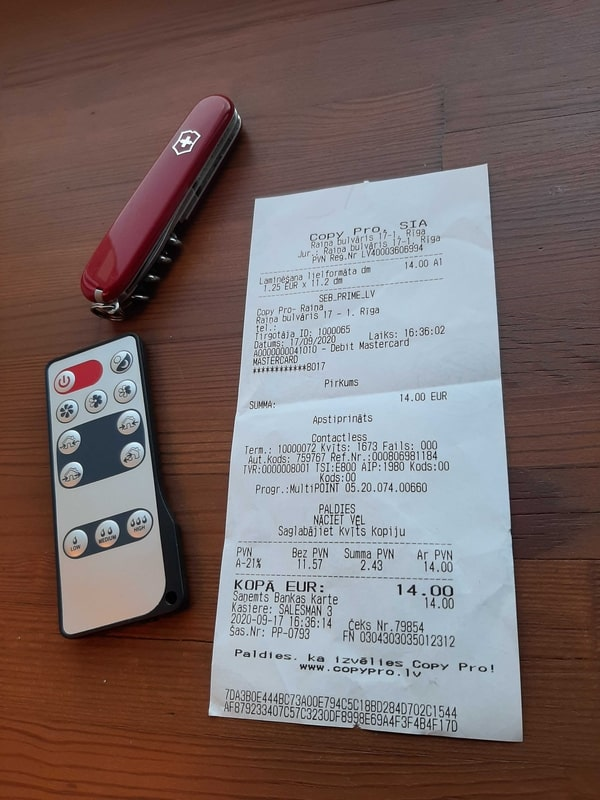

(np.float64(-0.5), np.float64(599.5), np.float64(799.5), np.float64(-0.5))

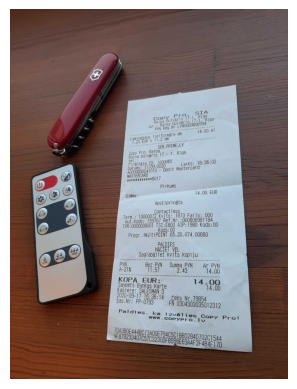

In [1]:
# pytesseract.pytesseract.tesseract_cmd = r "C:\ Program␣ F i l e s \ Tesseract−OCR \ t e s s e r a c t . exe "
# "C:\Program Files\Tesseract-OCR\tesseract.exe" 


### Préliminaire ###
pathSample="./sample.jpg"
from PIL import Image,ImageFilter

picturePillow = Image.open(pathSample)
picturePillow.show()

new_picture = picturePillow.filter(ImageFilter.BLUR)
# new_picture.save("./receipt-ocr-project/sample_blur.jpg",quality=95)
# new_picture.show()
# new_picture.close()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pictureMatplot = mpimg.imread(pathSample)
plt.imshow(pictureMatplot)
plt.axis("off")
# plt.show() # affichage dans une fenêtre


2.2

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
from imgutils import *

: 

In [ ]:
image=cv2.imread("sample.jpg")
plot_rgb(image)
cv2.imshow("Image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Réduction de la taille de l'image de base
smallImage=opencv_resize(image,500/image.shape[0]) 
plot_rgb(smallImage)
cv2.imshow("Image reduite",smallImage)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
# Affiche de l'image en niveau de gris 
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(imagegris)
cv2.imshow("Image grise", imagegris)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
image_gris_reduite=cv2.cvtColor(smallImage,cv2.COLOR_BGR2GRAY)
plot_gray(image_gris_reduite)
cv2.imshow("Image grise reduite", image_gris_reduite)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
image_floue=cv2.GaussianBlur(image,(13,13),0)
plot_rgb(image_floue)
cv2.imshow("Image Floue",image_floue)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
image_grise_floue_reduite=cv2.GaussianBlur(image_gris_reduite,(3,3),0)
plot_gray(image_grise_floue_reduite)
cv2.imshow("Image grise Floue réduite",image_grise_floue_reduite)
cv2.waitKey(0)
cv2.destroyAllWindows()


sûrement une erreur dans le code juste en dessous pour l'image dilatée, le reste au-dessus semble bon

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
image_dilatee = cv2.dilate(image_grise_floue_reduite, kernel)
plot_gray(image_dilatee)
cv2.imshow("Image dilatee",image_dilatee)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# finds edges in the input image and marks them in the output map edges
# On le fait uniquement pour l'image de base
edges_base = cv2.Canny(image,100,100,apertureSize=3)
cv2.imshow('Edges',edges_base)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# finds edges in the input image and marks them in the output map edges
# On le fait sur l'image qui a été modifié au fur et à mesure du code 
edges_tout = cv2.Canny(image_dilatee,100,100,apertureSize=3)
cv2.imshow('Edges',edges_tout)
cv2.waitKey(0)
cv2.destroyAllWindows()

2.3

Extraction des contours de l'image (changeme)

In [ ]:
# Find contours
contours, hierarchy = cv2.findContours(edges_base, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(imagegris, contours, -1, (0, 255, 0), 3)

plot_rgb(imagegris)
# Display the result
# cv2.imshow('Contours', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:

# Tri des contours par superficie décroissante
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
print(contours[0][:5])
# Dessiner les 10 plus grands contours sur une copie de l'image originale
image_top10_contours = image.copy()
cv2.drawContours(image_top10_contours, contours_trie[:10], -1, (0, 255, 0), 3)

# Affichage de l'image avec les 10 plus grands contours
plot_rgb(image_top10_contours)


In [ ]:
image=cv2.imread("sample.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
image_dilatee = cv2.dilate(imagegris, kernel)

edges_base = cv2.Canny(image_dilatee,100,100,apertureSize=3)
contours, hierarchy = cv2.findContours(edges_base, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect=get_receipt_contour(contours_trie[:10])
if contour_Rect is not None:
    image_Rect=image.copy()
    cv2.drawContours(image_Rect,[contour_Rect],-1,(255,0,0),3)
    plot_rgb(image_Rect)
else:
    print("No contour detected")

2.4


In [ ]:
import cv2
import numpy as np
from imgutils import *


image = cv2.imread("sample.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)
edges = cv2.Canny(image_flou, 75, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect = get_receipt_contour(contours_trie[:10])


if contour_Rect is not None:
    rect=contour_to_rect(contour_Rect)
    image_warped=wrap_perspective(image,rect)
    image_bw_scanner=bw_scanner(image_warped)
    
    cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Aucun contour détecté")


# Partie 3 : Détection des contours et du texte sur facture

In [ ]:
import cv2
import numpy as np
import pytesseract
import re




# Assurez-vous de mettre le bon chemin vers Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Chargement et traitement de l'image
image = cv2.imread(r".\sample.jpg")   #(r"data\data\1132-receipt.jpg")
imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)
edges = cv2.Canny(image_flou, 75, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
contour_Rect = get_receipt_contour(contours_trie[:10])


if contour_Rect is not None:
    rect=contour_to_rect(contour_Rect)
    image_warped=wrap_perspective(image,rect)
    image_bw_scanner=bw_scanner(image_warped)
    
    cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Aucun contour détecté")



# Pour image qui a déjà été traité
if len(image_bw_scanner.shape) == 2:  # Si l'image est en niveaux de gris
        image_bw_scanner = cv2.cvtColor(image_bw_scanner, cv2.COLOR_GRAY2BGR)
h, w,_= image_bw_scanner.shape
        
data = pytesseract.image_to_data(image_bw_scanner, output_type=pytesseract.Output.DICT, lang="eng")

maxi = 0
pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"
for i in range(len(data["text"])):
    text = data["text"][i]
    x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

    if text.strip():
           
        montant_match = pattern_regex.search(text)
        if montant_match:
            cv2.rectangle(image_bw_scanner, (x, y), (x + w, y + h), (0, 255, 0), 2)
            montant = float(montant_match.group().replace(",", "."))
            maxi = max(maxi, montant)

 # Appliquer OCR sur l'image traitée
montant_total1, image_avec_rectangles = maxi,image_bw_scanner 

# Affichage
cv2.imshow("Image avec texte détecté", image_avec_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Affichage du montant total détecté
print(f"Montant total image traitée détecté : {montant_total1} €")















# Image d'origine
h, w, _ = image.shape
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="eng")

maxi = 0
pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"

for i in range(len(data["text"])):
    text = data["text"][i]
    x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

    if text.strip():
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        montant_match = pattern_regex.search(text)
        if montant_match:
            montant = float(montant_match.group().replace(",", "."))
            maxi = max(maxi, montant)

# Appliquer OCR sur l'image traitée
montant_total, image_avec_rectangles = maxi,image 
# Affichage
cv2.imshow("Image avec texte détecté", image_avec_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()




# Affichage du montant total détecté
print(f"Montant total détecté : {montant_total} €")


# Partie 4 : Résumé et résultats

### Appel des fonctions de filtre d'image et de détection de texte.

In [59]:

import cv2
import numpy as np
import pytesseract
import re
from imgutils import *
import logging

# Creation de logger
Dossier_log="receipt_ocr.log"
DEBUG_MODE = False  # Mettez sur True pour afficher les logs

if DEBUG_MODE:
    logging.basicConfig(level=logging.DEBUG,
                        format="%(asctime)s - %(levelname)s - %(message)s",
                        handlers=[
                            logging.FileHandler(Dossier_log),
                            logging.StreamHandler()
                        ])
else:
    logging.basicConfig(level=logging.CRITICAL)  


def forme_image(path:str,picture_show:bool=False):
    """"
    Fonction pour charger une image, la traiter et la convertir en noir et blanc.
    Elle détecte également le contour du reçu et le redresse.
    
    Si l'image ne peut pas être chargée, elle renvoie None.
    Si aucun contour n'est détecté, elle renvoie -1.
    Sinon, elle renvoie l'image traitée en noir et blanc.

    picture_show : bool : Si True, affiche l'image traitée.
    """
    # logging.info(f"Chargement de l'image {path}")
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    image = cv2.imread(path)
    if image is None:
        logging.error("Erreur : Impossible de charger l'image.")
        return None
    
    logging.debug("Conversion en niveaux de gris")
    imagegris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    logging.debug("Floutage de l'image")
    image_flou = cv2.GaussianBlur(imagegris, (5, 5), 0)

    logging.debug("Détection des contours")
    edges = cv2.Canny(image_flou, threshold1=75, threshold2=200)

    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    logging.info(f"{len(contours)} contours détectés")


    contours_trie = sorted(contours, key=cv2.contourArea, reverse=True)
    contour_Rect = get_receipt_contour(contours_trie[:10])
    if contour_Rect is not None:
        logging.info("Contour détecté")
        rect=contour_to_rect(contour_Rect)
        
        logging.debug("Rectification de la perspective")
        image_warped=wrap_perspective(image,rect)

        logging.debug("Conversion en noir et blanc")
        image_bw_scanner=bw_scanner(image_warped)

        if picture_show:
            logging.debug("Affichage de l'image traitée")
            cv2.imshow("Image traitée noir-blanc", image_bw_scanner)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        return image_bw_scanner
    else:
        logging.debug("Aucun contour détecté")
        return -1
    
def detect_text(image:np.array,picture_show:bool=False)->float:
    """"
    Fonction pour détecter le texte dans une image à l'aide de Tesseract OCR.
    image : np.ndarray : Image à traiter.
    picture_show : bool : Si True, affiche l'image avec le texte détecté.
    
    Si l'image est None, elle renvoie None.
    Si aucun texte n'est détecté, elle renvoie -1.
    Sinon, elle renvoie le montant total détecté.
    
    """

    if image is None:
        logging.error("L'image fournie est None, arrêt de la détection de texte.")
        return None
    
    if type(image)==int:
        if image==-1:
            logging.debug("L'image n'a aucun contour détecté")
            return -1


    logging.info("Début de la détection de texte avec Tesseract OCR")

    # Fonction pour extraire et détecter le texte
    if len(image.shape) == 2:  # Si l'image est en niveaux de gris
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    h, w,_= image.shape
    logging.debug(f"Dimensions de l'image : {w}x{h}")
        
    data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="eng")
    logging.debug("Données OCR extraites")
    maxi = 0
    pattern_regex = re.compile(r'\d{1,3}(?:[.,]\d{2})')  # Recherche de chiffres type "12.34" ou "1,234.56"

    logging.debug(f"Nombre de blocs de texte détectés : {len(data['text'])}")
    for i in range(len(data["text"])):
        text = data["text"][i]
        x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]

        if text.strip():
            logging.debug(f"Texte détecté : {text}")
            montant_match = pattern_regex.search(text)
            if montant_match:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                montant = float(montant_match.group().replace(",", "."))
                logging.info(f"Montant détecté : {montant} €")
                maxi = max(maxi, montant)



    # Appliquer OCR sur l'image traitée
    montant_total, image_avec_rectangles = maxi,image 

    if picture_show:
        # Affichage
        cv2.imshow("Image avec texte détecté", image_avec_rectangles)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    logging.info(f"Montant total détecté : {montant_total} €")
    return montant_total
    


### Test des fonctions avec et sans filtre avec un exemple

In [60]:
path=r"data\data\sample.jpg"
image_avec_filtre=forme_image(path,picture_show=True)
image_sans_filtre = cv2.imread(path)
montant_avec_filtre=detect_text(image_avec_filtre,picture_show=True)
montant2_sans_filtre=detect_text(image_sans_filtre,picture_show=True)
# Affichage des montants
print("Montant avec filtre : ", montant_avec_filtre,"\nMontant sans filtre : ", montant2_sans_filtre)


Montant avec filtre :  20.07 
Montant sans filtre :  14.0


### Récupération de toutes les images de notre dataset

In [61]:
import os
import cv2
import numpy as np
import pytesseract
import re
from imgutils import *

def parcourir_dossier(dossier:str)->list:
    liste_result=[]
    """
    Fonction pour parcourir un dossier et ses sous-dossiers,
    et traiter les images en utilisant la fonction forme_image.
    
    dossier : str : Chemin du dossier à parcourir.
    Retourne 
    """
    for racine, sous_dossiers, fichiers in os.walk(dossier):
        for fichier in fichiers:
            chemin_complet = os.path.join(racine, fichier)
            if chemin_complet.endswith(('.jpg', '.jpeg', '.png')):
                logging.info(f"Traitement de l'image : {chemin_complet}")
                image_avec_filtre=forme_image(chemin_complet)
                image_sans_filtre = cv2.imread(chemin_complet)
                if image_avec_filtre is None:
                    logging.error(f"Erreur lors du traitement de l'image : {chemin_complet}")
                    
                if type(image_avec_filtre) == int:
                    if image_avec_filtre == -1:
                        logging.error(f"Aucun contour détecté dans l'image : {chemin_complet}")
                        
                    
                # Montant avec filtre
                montant_avec_filtre=detect_text(image_avec_filtre)
                montant2_sans_filtre=detect_text(image_sans_filtre)
                logging.info(f"Pour image {os.path.basename(chemin_complet)} :")
                logging.info(f"Montant avec filtre : {montant_avec_filtre} €")
                logging.info(f"Montant sans filtre : {montant2_sans_filtre} €")
                # Enregistrement des résultats dans la liste
                liste_result.append({
                    "image": os.path.basename(chemin_complet),
                    "chemin": chemin_complet,
                    "montant_avec_filtre": montant_avec_filtre,
                    "montant_sans_filtre": montant2_sans_filtre
                })
    return liste_result
      
from pathlib import Path
dossier_a_parcourir = Path("data") / "data" 


liste_result=parcourir_dossier(dossier_a_parcourir)
print(liste_result)
print("Liste des résultats :")
for result in liste_result:
    print(f"Image : {result['image']}")
    print(f"Montant avec filtre : {result['montant_avec_filtre']} €")
    print(f"Montant sans filtre : {result['montant_sans_filtre']} €")
    print("-" * 50)



[{'image': '1132-receipt.jpg', 'chemin': 'data\\data\\1132-receipt.jpg', 'montant_avec_filtre': -1, 'montant_sans_filtre': 61.8}, {'image': '1133-receipt.jpg', 'chemin': 'data\\data\\1133-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 173.48}, {'image': '1134-receipt.jpg', 'chemin': 'data\\data\\1134-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 0}, {'image': '1135-receipt.jpg', 'chemin': 'data\\data\\1135-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 48.0}, {'image': '1136-receipt.jpg', 'chemin': 'data\\data\\1136-receipt.jpg', 'montant_avec_filtre': -1, 'montant_sans_filtre': 13.13}, {'image': '1137-receipt.jpg', 'chemin': 'data\\data\\1137-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 0}, {'image': '1138-receipt.jpg', 'chemin': 'data\\data\\1138-receipt.jpg', 'montant_avec_filtre': 0, 'montant_sans_filtre': 25.94}, {'image': '1139-receipt.jpg', 'chemin': 'data\\data\\1139-receipt.jpg', 'montant_avec_filtre': -1, 'mon

### test et comparaison des images du dataset avec nos valeurs réelles des factures

In [62]:

liste_valeur_relle = [
    ["1132-receipt.jpg", 61.80],
    ["1133-receipt.jpg", 146.57],
    ["1134-receipt.jpg", 21.73],
    ["1135-receipt.jpg", 146.73],
    ["1136-receipt.jpg", 13.13],
    ["1137-receipt.jpg", 14.17],
    ["1138-receipt.jpg", 25.94],
    ["1139-receipt.jpg", 617.00],
    ["1140-receipt.jpg", 25.47],
    ["1141-receipt.jpg", 88.62],
    ["1143-receipt.jpg", 84.78],
    ["1144-receipt.jpg", 46.40],
    ["1145-receipt.jpg", 65.14],
    ["1146-receipt.jpg", 13.26],
    ["1147-receipt.jpg", 13.00],
    ["1148-receipt.jpg", 13.07],
    ["1149-receipt.jpg", 5.29],
    ["1150-receipt.jpg", 80.45],
    ["1151-receipt.jpg", 13.53],
    ["1152-receipt.jpg", 62.70],
    ["1153-receipt.jpg", 313.49],
    ["1154-receipt.jpg", 73.24],
    ["1155-receipt.jpg", 129.75],
    ["1156-receipt.jpg", 14.85],
    ["1157-receipt.jpg", 9.70],
    ["1158-receipt.jpg", 780.45],
    ["1159-receipt.jpg", 6.59],
    ["1160-receipt.jpg", 33.34],
    ["1161-receipt.jpg", 53.23],
    ["1162-receipt.jpg", 333.72],
    ["1163-receipt.jpg", 41.32],
    ["1164-receipt.jpg", 22.70],
    ["1165-receipt.jpg", 117.00],
    ["1166-receipt.jpg", 42.16],
    ["1167-receipt.jpg", 33.75],
    ["1168-receipt.jpg", 7.61],
    ["1169-receipt.jpg", 46.39],
    ["1170-receipt.jpg", 109.28],
    ["1171-receipt.jpg", 523.00],
    ["1175-receipt.jpg", 2.44],
    ["1181-receipt.jpg", 439.86],
    ["1182-receipt.jpg", 50.80],
    ["1183-receipt.jpg", 10.00],
    ["1184-receipt.jpg", 193.35],
    ["1185-receipt.jpg", 28.40],
    ["1188-receipt.jpg", 26.96],
    ["1189-receipt.jpg", 27.08],
    ["1191-receipt.jpg", 29.98],
    ["1192-receipt.jpg", 37.29],
    ["1194-receipt.jpg", 65.10],
    ["1197-receipt.jpg", 34.00],
    ["1198-receipt.jpg", 154.78],
    ["sample.jpg", 14.00],
]
print(liste_valeur_relle)


[['1132-receipt.jpg', 61.8], ['1133-receipt.jpg', 146.57], ['1134-receipt.jpg', 21.73], ['1135-receipt.jpg', 146.73], ['1136-receipt.jpg', 13.13], ['1137-receipt.jpg', 14.17], ['1138-receipt.jpg', 25.94], ['1139-receipt.jpg', 617.0], ['1140-receipt.jpg', 25.47], ['1141-receipt.jpg', 88.62], ['1143-receipt.jpg', 84.78], ['1144-receipt.jpg', 46.4], ['1145-receipt.jpg', 65.14], ['1146-receipt.jpg', 13.26], ['1147-receipt.jpg', 13.0], ['1148-receipt.jpg', 13.07], ['1149-receipt.jpg', 5.29], ['1150-receipt.jpg', 80.45], ['1151-receipt.jpg', 13.53], ['1152-receipt.jpg', 62.7], ['1153-receipt.jpg', 313.49], ['1154-receipt.jpg', 73.24], ['1155-receipt.jpg', 129.75], ['1156-receipt.jpg', 14.85], ['1157-receipt.jpg', 9.7], ['1158-receipt.jpg', 780.45], ['1159-receipt.jpg', 6.59], ['1160-receipt.jpg', 33.34], ['1161-receipt.jpg', 53.23], ['1162-receipt.jpg', 333.72], ['1163-receipt.jpg', 41.32], ['1164-receipt.jpg', 22.7], ['1165-receipt.jpg', 117.0], ['1166-receipt.jpg', 42.16], ['1167-receipt.j

In [63]:
percentage_succes_avec_filtre=[]
percentage_succes_sans_filtre=[]

erreur_contour=[]
for image in liste_result:
    for valeur in liste_valeur_relle:
        if image["image"]==valeur[0]:
            print(f"Image : {image['image']}")

            if image["montant_avec_filtre"]==valeur[1]:
                percentage_succes_avec_filtre.append(1)
            else:
                if image["montant_avec_filtre"]==-1:
                    erreur_contour.append(-1)
                percentage_succes_avec_filtre.append(0)
            if image["montant_sans_filtre"]==valeur[1]:
                percentage_succes_sans_filtre.append(1)
            else:  
                percentage_succes_sans_filtre.append(0)

            print(f"Montant avec filtre : {image['montant_avec_filtre']} €")
            print(f"Montant sans filtre : {image['montant_sans_filtre']} €")
            print(f"Valeur réelle : {valeur[1]} €")
            print("-" * 50)

print("\n\n")

print("Pourcentage de réussite sans filtre : ", sum(percentage_succes_sans_filtre)/len(percentage_succes_sans_filtre)*100,"%")
print("Pourcentage de réussite avec filtre : ", sum(percentage_succes_avec_filtre)/len(percentage_succes_avec_filtre)*100,"%")
print("Nombre d'erreur de contour avec notre filtre : ", len(erreur_contour),"images sur ", len(liste_result), "n'ont pas de contour détecté")

Image : 1132-receipt.jpg
Montant avec filtre : -1 €
Montant sans filtre : 61.8 €
Valeur réelle : 61.8 €
--------------------------------------------------
Image : 1133-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 173.48 €
Valeur réelle : 146.57 €
--------------------------------------------------
Image : 1134-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 0 €
Valeur réelle : 21.73 €
--------------------------------------------------
Image : 1135-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 48.0 €
Valeur réelle : 146.73 €
--------------------------------------------------
Image : 1136-receipt.jpg
Montant avec filtre : -1 €
Montant sans filtre : 13.13 €
Valeur réelle : 13.13 €
--------------------------------------------------
Image : 1137-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre : 0 €
Valeur réelle : 14.17 €
--------------------------------------------------
Image : 1138-receipt.jpg
Montant avec filtre : 0 €
Montant sans filtre

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# Initialisation
montants_reels_avec_filtre = []
montants_predits_avec_filtre = []

montants_reels_sans_filtre = []
montants_predits_sans_filtre = []

# Collecte des montants
for image in liste_result:
    for valeur in liste_valeur_relle:
        if image["image"] == valeur[0]:
            # Cas avec filtre
            if image["montant_avec_filtre"] != -1:
                montants_reels_avec_filtre.append(valeur[1])
                montants_predits_avec_filtre.append(image["montant_avec_filtre"])

            # Cas sans filtre
            if image["montant_sans_filtre"] != -1:
                montants_reels_sans_filtre.append(valeur[1])
                montants_predits_sans_filtre.append(image["montant_sans_filtre"])

# Vérifications
assert len(montants_reels_avec_filtre) == len(montants_predits_avec_filtre), "Erreur: données avec filtre incohérentes"
assert len(montants_reels_sans_filtre) == len(montants_predits_sans_filtre), "Erreur: données sans filtre incohérentes"

# Métriques pour AVEC filtre
print("\n=== MÉTRIQUES POUR 'AVEC FILTRE' ===")
print(f"MAE : {mean_absolute_error(montants_reels_avec_filtre, montants_predits_avec_filtre):.2f} €")
print(f"RMSE : {mean_squared_error(montants_reels_avec_filtre, montants_predits_avec_filtre):.2f} €")
print(f"R² : {r2_score(montants_reels_avec_filtre, montants_predits_avec_filtre):.2f}")
# Métriques pour SANS filtre
print("\n=== MÉTRIQUES POUR 'SANS FILTRE' ===")
print(f"MAE : {mean_absolute_error(montants_reels_sans_filtre, montants_predits_sans_filtre):.2f} €")
print(f"RMSE : {mean_squared_error(montants_reels_sans_filtre, montants_predits_sans_filtre):.2f} €")
print(f"R² : {r2_score(montants_reels_sans_filtre, montants_predits_sans_filtre):.2f}")



=== MÉTRIQUES POUR 'AVEC FILTRE' ===
MAE : 72.10 €
RMSE : 12341.78 €
R² : -1.14

=== MÉTRIQUES POUR 'SANS FILTRE' ===
MAE : 53.84 €
RMSE : 22870.29 €
R² : 0.09


C:\Users\benja\AppData\Local\Temp\ipykernel_25212\2163485316.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors_avec_filtre, errors_sans_filtre], labels=["Avec filtre", "Sans filtre"], patch_artist=True)


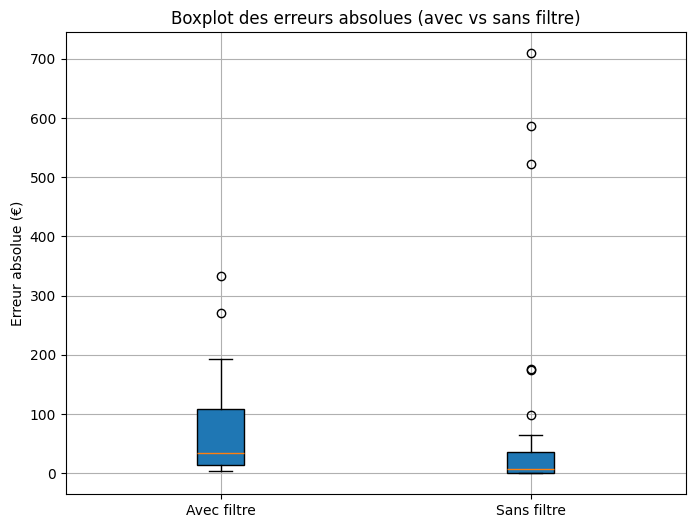

In [65]:
import matplotlib.pyplot as plt

# Même calcul des erreurs qu'avant
errors_avec_filtre = []
errors_sans_filtre = []

for image in liste_result:
    for valeur in liste_valeur_relle:
        if image["image"] == valeur[0]:
            vrai_montant = valeur[1]
            montant_avec = image["montant_avec_filtre"]
            montant_sans = image["montant_sans_filtre"]

            if montant_avec != -1:
                errors_avec_filtre.append(abs(montant_avec - vrai_montant))
            if montant_sans != -1:
                errors_sans_filtre.append(abs(montant_sans - vrai_montant))

# Création du boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([errors_avec_filtre, errors_sans_filtre], labels=["Avec filtre", "Sans filtre"], patch_artist=True)

plt.title("Boxplot des erreurs absolues (avec vs sans filtre)")
plt.ylabel("Erreur absolue (€)")
plt.grid(True)
plt.show()


# Modèle HuggingFace

Suite à nos précédents résultats peu performants, nous allons tester un modèle entraîner pour détecter des factures sur la plateforme Hugging Face.
Lien vers le modèle : https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice

Ce modèle a été entraîné sur un dataset de facture de microsoft LayoutMV3-base, pour détecter : le nom de la personne facturée, l'adresse de la personne facturée, le code postal de la personne facturée, la date de la facturation,... et surtout les sous-totaux et le total de la facture.

Les hyperparamètres du modèle sont donnés sur la page du modèle. Les voici :

learning_rate: 1e-05

train_batch_size: 2

eval_batch_size: 2

seed: 42

optimizer: Adam with betas=(0.9,0.999) and epsilon=1e-08

lr_scheduler_type: linear

training_steps: 2000



lien vers le github des codes pour utiliser le modèle : https://github.com/Theivaprakasham/layoutlmv3



Ce modèle n'a pas pour but de détecter des prix. Il a pour but de repérer la structure d'une facture. Si le prix total n'est pas détecté, on va prédire la position où il pourrait se situer. On utilisera ensuite PyTesseract pour obtenir le prix.

In [68]:
import os
os.system('pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu')
import re
import numpy as np
from transformers import AutoProcessor, AutoModelForTokenClassification
from PIL import Image, ImageDraw, ImageFont,ImageEnhance
import pytesseract

# Si besoin, précise ici le chemin vers tesseract.exe
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# 1. Charger le processor et le modèle fine-tuné “wildreceipt”
processor = AutoProcessor.from_pretrained(
    "Theivaprakasham/layoutlmv3-finetuned-wildreceipt",
    apply_ocr=True
)
model = AutoModelForTokenClassification.from_pretrained(
    "Theivaprakasham/layoutlmv3-finetuned-wildreceipt"
)

# 2. Couleurs pour chaque label
label2color = {
    "Date_key": 'red',           "Date_value": 'green',
    "Ignore": 'orange',          "Others": 'orange',
    "Prod_item_key": 'red',      "Prod_item_value": 'green',
    "Prod_price_key": 'red',     "Prod_price_value": 'green',
    "Prod_quantity_key": 'red',  "Prod_quantity_value": 'green',
    "Store_addr_key": 'red',     "Store_addr_value": 'green',
    "Store_name_key": 'red',     "Store_name_value": 'green',
    "Subtotal_key": 'red',       "Subtotal_value": 'green',
    "Tax_key": 'red',            "Tax_value": 'green',
    "Tel_key": 'red',            "Tel_value": 'green',
    "Time_key": 'red',           "Time_value": 'green',
    "Tips_key": 'red',           "Tips_value": 'green',
    "Total_key": 'red',          "Total_value": 'blue'
}

# 3. Utilitaires
def unnormalize_box(bbox, width, height):
    return [
        width  * (bbox[0] / 1000),
        height * (bbox[1] / 1000),
        width  * (bbox[2] / 1000),
        height * (bbox[3] / 1000),
    ]

def extract_total_fallback(image: Image.Image,sans_preprocess:bool=True) -> str | None:
    """OCR global : retourne le plus grand montant trouvé."""
    
    image_preproc = preprocess_for_ocr(image)
    text = pytesseract.image_to_string(image_preproc, config='--psm 6')
    

    matches = re.findall(r"\$?\s*([0-9]+[.,][0-9]{2})", text)
    if not matches:
        if sans_preprocess:
            text_sans_preproc = pytesseract.image_to_string(image, config='--psm 6')
            matches_sans_prepo = re.findall(r"\$?\s*([0-9]+[.,][0-9]{2})", text_sans_preproc)
            if not matches_sans_prepo:
                return None
        
    # Remplacer virgules par points et convertir pour trouver le plus grand
    amounts = [float(m.replace(',', '.')) for m in matches]
    biggest = max(amounts)
    return f"{biggest:.2f}"

def preprocess_for_ocr(image: Image.Image) -> Image.Image:
    """Améliore une image pour Tesseract OCR."""
    # Agrandir
    new_size = (image.width * 2, image.height * 2)
    image = image.resize(new_size, Image.Resampling.LANCZOS)

    # Convertir en niveaux de gris
    image = image.convert("L")

    # Booster le contraste
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.0)

    # Optionnel : rendre encore plus net
    sharp = ImageEnhance.Sharpness(image)
    image = sharp.enhance(2.0)

    return image

# 4. Traitement principal
def process_image(image: Image.Image,sans_preprocess:bool=True) -> tuple[Image.Image, str | None]:
    w, h = image.size

    # a) Encodage + prédiction
    enc = processor(image, truncation=True,
                    return_offsets_mapping=True,
                    return_tensors="pt")
    offsets = enc.pop('offset_mapping')
    outputs = model(**enc)
    preds   = outputs.logits.argmax(-1).squeeze().tolist()
    boxes   = enc.bbox.squeeze().tolist()

    # b) Filtre des sous-tokens
    is_sub = np.array(offsets.squeeze().tolist())[:,0] != 0

    # c) id2label en int -> str
    cfg_labels = {int(k):v for k,v in model.config.id2label.items()}

    true_labels = [
        cfg_labels[p] for idx, p in enumerate(preds)
        if not is_sub[idx]
    ]
    true_boxes = [
        unnormalize_box(b, w, h) for idx, b in enumerate(boxes)
        if not is_sub[idx]
    ]

    image_original = image.copy()
    # d) Annoter
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    # Liste des boîtes `Total_value`
    total_value_boxes: list[list[float]] = []

    for label, box in zip(true_labels, true_boxes):
        draw.rectangle(box, outline=label2color.get(label,'red'), width=2)
        draw.text((box[0]+5, box[1]-10),
                  text=label,
                  fill=label2color.get(label,'red'),
                  font=font)
        if label == "Total_value":
            total_value_boxes.append(box)

    # e) Extraction du montant : priorité aux boîtes détectées
    montant: str | None = None

    if total_value_boxes:
        # si plusieurs, on prend la première
        bx = total_value_boxes[0]
        crop = image_original.crop(bx).convert("L")  # niveaux de gris
        ocr_text = pytesseract.image_to_string(crop, config='--psm 7 -c tessedit_char_whitelist=0123456789.,$')
    
        m = re.search(r"\$?\s*([0-9]+[.,][0-9]{2})", ocr_text)
        montant = m.group(1) if m else None

    # sinon fallback global
    if montant is None:
        montant = extract_total_fallback(image_original,sans_preprocess=sans_preprocess)
        

    return image, montant

# 5. Exemple d’utilisation
if __name__ == "__main__":
    img_path =r"./data/data/1167-receipt.jpg"

    img = Image.open(img_path).convert("RGB")
    ann_img, total = process_image(img)

    # Sauvegarde & affichage
    out_path = r"annotated_sample.jpg"
    ann_img.save(out_path)
    ann_img.show()

    print("Image annotée :", out_path)
    print("Montant extrait :", total or "— non détecté —")
    if total:
        print(f"✅ Montant total détecté : {total}")
    else:
        print("⚠️ Aucun montant 'TOTAL' détecté sur l'image.")
    print("⚠️ Montant extrait par OCR (fallback) :", total or "— non détecté —")

Image annotée : annotated_sample.jpg
Montant extrait : 33.75
✅ Montant total détecté : 33.75
⚠️ Montant extrait par OCR (fallback) : 33.75


In [ ]:
import os
import re
import logging
from PIL import Image
from tqdm import tqdm  # barre de progression sympa

# Liste des vraies valeurs
liste_valeur_relle = [
    ["1132-receipt.jpg", 61.80],
    ["1133-receipt.jpg", 146.57],
    ["1134-receipt.jpg", 21.73],
    ["1135-receipt.jpg", 146.73],
    ["1136-receipt.jpg", 13.13],
    ["1137-receipt.jpg", 14.17],
    ["1138-receipt.jpg", 25.94],
    ["1139-receipt.jpg", 617.00],
    ["1140-receipt.jpg", 25.47],
    ["1141-receipt.jpg", 88.62],
    ["1143-receipt.jpg", 84.78],
    ["1144-receipt.jpg", 46.40],
    ["1145-receipt.jpg", 65.14],
    ["1146-receipt.jpg", 13.26],
    ["1147-receipt.jpg", 13.00],
    ["1148-receipt.jpg", 13.07],
    ["1149-receipt.jpg", 5.29],
    ["1150-receipt.jpg", 80.45],
    ["1151-receipt.jpg", 13.53],
    ["1152-receipt.jpg", 62.70],
    ["1153-receipt.jpg", 313.49],
    ["1154-receipt.jpg", 73.24],
    ["1155-receipt.jpg", 129.75],
    ["1156-receipt.jpg", 14.85],
    ["1157-receipt.jpg", 9.70],
    ["1158-receipt.jpg", 780.45],
    ["1159-receipt.jpg", 6.59],
    ["1160-receipt.jpg", 33.34],
    ["1161-receipt.jpg", 53.23],
    ["1162-receipt.jpg", 333.72],
    ["1163-receipt.jpg", 41.32],
    ["1164-receipt.jpg", 22.70],
    ["1165-receipt.jpg", 117.00],
    ["1166-receipt.jpg", 42.16],
    ["1167-receipt.jpg", 33.75],
    ["1168-receipt.jpg", 7.61],
    ["1169-receipt.jpg", 46.39],
    ["1170-receipt.jpg", 109.28],
    ["1171-receipt.jpg", 523.00],
    ["1175-receipt.jpg", 2.44],
    ["1181-receipt.jpg", 439.86],
    ["1182-receipt.jpg", 50.80],
    ["1183-receipt.jpg", 10.00],
    ["1184-receipt.jpg", 193.35],
    ["1185-receipt.jpg", 28.40],
    ["1188-receipt.jpg", 26.96],
    ["1189-receipt.jpg", 27.08],
    ["1191-receipt.jpg", 29.98],
    ["1192-receipt.jpg", 37.29],
    ["1194-receipt.jpg", 65.10],
    ["1197-receipt.jpg", 34.00],
    ["1198-receipt.jpg", 154.78],
    ["sample.jpg", 14.00],
]

# Dossier à parcourir
from pathlib import Path

dossier_a_parcourir = Path("data") / "data" 

# Fonction de parcours
def parcourir_dossier_et_tester(dossier:str, liste_valeur_relle:list,sans_preprocess:bool=True)->None:
    results = []
    erreurs_contour = []
    percentage_succes = []

    # Dictionnaire pour accéder rapidement aux vraies valeurs
    vrai_valeurs_dict = {img: val for img, val in liste_valeur_relle}

    for racine, sous_dossiers, fichiers in os.walk(dossier):
        for fichier in tqdm(fichiers, desc="Traitement des images"):
            if fichier.endswith(('.jpg', '.jpeg', '.png')):
                chemin_complet = os.path.join(racine, fichier)

                try:
                    img = Image.open(chemin_complet).convert("RGB")
                    _, montant_str = process_image(img,sans_preprocess=sans_preprocess)

                    if montant_str is None:
                        montant_detecte = None
                    else:
                        # Nettoyage du texte montant
                        montant_detecte = float(montant_str.replace(',', '.').replace('$','').strip())
                    
                    montant_reel = vrai_valeurs_dict.get(fichier)

                    if montant_reel is None:
                        logging.warning(f"Pas de valeur réelle pour {fichier}")
                        continue

                    # Vérification de la réussite
                    if montant_detecte is None:
                        # print(f"Montant non détecté pour {fichier}")
                        success = False
                    else:
                        # Acceptons une tolérance de +/- 5% du montant
                        tolerance = 0.05 * montant_reel
                        # success = abs(montant_detecte - montant_reel) <= tolerance
                     
                        success = montant_detecte == montant_reel

                        #print(f"Montant détecté : {montant_detecte} €")
                        #print(f"Montant réel : {montant_reel} €")
                    
                    percentage_succes.append(int(success))

                    results.append({
                        "image": fichier,
                        "montant_detecte": montant_detecte,
                        "montant_reel": montant_reel,
                        "success": success
                    })

                except Exception as e:
                    logging.error(f"Erreur sur l'image {fichier} : {e}")
                    erreurs_contour.append(fichier)

    if not results:
        print("Aucune image traitée.")
        return None
    # Résultats finaux
    pourcentage_final = sum(percentage_succes) / len(percentage_succes) * 100

    print(f"\nPourcentage de réussite (layoutlmv3 {' + fallback' if not sans_preprocess else ''}) : {pourcentage_final:.2f}%")
    print(f"Nombre d'erreurs de traitement : {len(erreurs_contour)} images sur {len(results)+len(erreurs_contour)} images")
    print("\nDétail des erreurs (images non traitées correctement) :")
    for err in erreurs_contour:
        print("-", err)

    return results

# Lancement
liste_resultats_hugging_sans_processes = parcourir_dossier_et_tester(dossier_a_parcourir, liste_valeur_relle,sans_preprocess=False)
print("\n\n\n"+"="*50,"\n\n\n")
liste_resultats_hugging = parcourir_dossier_et_tester(dossier_a_parcourir, liste_valeur_relle,sans_preprocess=True)


Traitement des images:   0%|          | 0/53 [00:00<?, ?it/s]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   2%|▏         | 1/53 [00:00<00:39,  1.30it/s]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   4%|▍         | 2/53 [00:02<01:00,  1.19s/it]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   6%|▌         | 3/53 [00:03<01:01,  1.24s/it]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be remo


Pourcentage de réussite (layoutlmv3  + fallback) : 62.00%
Nombre d'erreurs de traitement : 3 images sur 53 images

Détail des erreurs (images non traitées correctement) :
- 1156-receipt.jpg
- 1181-receipt.jpg
- 1194-receipt.jpg








Traitement des images:   0%|          | 0/53 [00:00<?, ?it/s]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   2%|▏         | 1/53 [00:00<00:27,  1.89it/s]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   4%|▍         | 2/53 [00:01<00:54,  1.06s/it]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Traitement des images:   6%|▌         | 3/53 [00:03<00:56,  1.13s/it]/home/ben/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be remo


Pourcentage de réussite (layoutlmv3 ) : 59.62%
Nombre d'erreurs de traitement : 1 images sur 53 images

Détail des erreurs (images non traitées correctement) :
- 1194-receipt.jpg


Métriques Modèle HuggingFace

In [ ]:
from statistics import mean

# Calcul des métriques
def metriques(liste_resultats:list)->None:
    """Calcul des métriques sur les résultats"""
    
    mae = sum(abs(r["montant_detecte"] - r["montant_reel"]) for r in liste_resultats if r["montant_detecte"] is not None) / len(liste_resultats)
    print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")

    mse  = sum((r["montant_detecte"] - r["montant_reel"])**2 for r in liste_resultats if r["montant_detecte"] is not None) / len(liste_resultats)
    rmse = mse**0.5
    print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f}")

    y_true = [r["montant_reel"] for r in liste_resultats if r["montant_detecte"] is not None]
    y_pred = [r["montant_detecte"] for r in liste_resultats if r["montant_detecte"] is not None]

    mean_y = mean(y_true)
    ss_tot = sum((y - mean_y)**2 for y in y_true)
    ss_res = sum((y - y_hat)**2 for y, y_hat in zip(y_true, y_pred))
    r2 = 1 - ss_res / ss_tot

    print(f"Coefficient de détermination (R²) : {r2:.2f}")

print("\n=== MÉTRIQUES POUR 'AVEC FILTRE' ===")
metriques(liste_resultats_hugging_sans_processes)
print("\n=== MÉTRIQUES POUR 'SANS FILTRE' ===")
metriques(liste_resultats_hugging)


=== MÉTRIQUES POUR 'AVEC FILTRE' ===
Erreur absolue moyenne (MAE) : 58.21
Erreur quadratique moyenne (RMSE) : 252.43
Coefficient de détermination (R²) : -1.62

=== MÉTRIQUES POUR 'SANS FILTRE' ===
Erreur absolue moyenne (MAE) : 55.97
Erreur quadratique moyenne (RMSE) : 247.53
Coefficient de détermination (R²) : -1.62


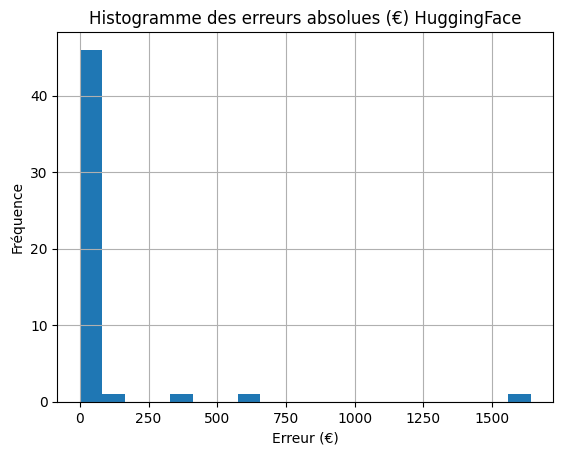

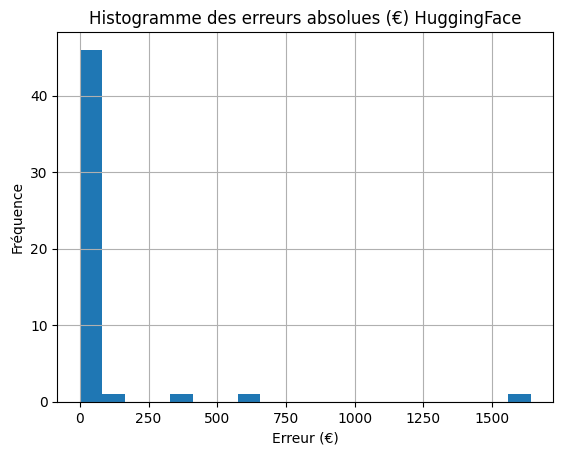

In [ ]:
import matplotlib.pyplot as plt
errors = [abs(r["montant_detecte"] - r["montant_reel"]) for r in liste_resultats_hugging if r["montant_detecte"] is not None]
plt.hist(errors, bins=20)
plt.title("Distribution des erreurs absolues")
plt.xlabel("Erreur (€)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.title("Histogramme des erreurs absolues (€) HuggingFace")
plt.show()

errors = [abs(r["montant_detecte"] - r["montant_reel"]) for r in liste_resultats_hugging_sans_processes if r["montant_detecte"] is not None]
plt.hist(errors, bins=20)
plt.title("Distribution des erreurs absolues")
plt.xlabel("Erreur (€)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.title("Histogramme des erreurs absolues (€) HuggingFace")
plt.show()



# Utilisation avec Ollama

À partir de cette partie, nous allons utilisé le GPU de notre PC. Pour se faire, nous passons par une WSL sur Ubuntu pour indiquer l'utilisation de notre GPU.

Nous installons le LLM Ollama et le modèle gemma3:4b pour pouvoir détecter des images.
Ollama posssède d'autres modèles (voir ce lien : https://www.ollama.com/library/gemma3).

In [ ]:
# Install the ollama module
%pip install ollama

from ollama import chat

response = chat(
    model="gemma3:4b",
    messages=[
        {
            "role": "user",
            "content": "Why is the sky blue?",
        },
    ],
)
print(response.message.content)
# C'est normal si cela prend beaucoup de temps la première fois, car le modèle doit être téléchargé.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Okay, let's break down why the sky is blue! It's a fantastic example of a physics phenomenon called **Rayleigh scattering**. Here's the explanation:

**1. Sunlight & Colors:**

* Sunlight isn't actually white. It's made up of *all* the colors of the rainbow – red, orange, yellow, green, blue, indigo, and violet. You can see this when sunlight passes through a prism, which separates the colors.

**2. Entering the Atmosphere:**

* As sunlight enters the Earth's atmosphere, it bumps into tiny air molecules (mostly nitrogen and oxygen).

**3. Rayleigh Scattering – The Key:**

* **Rayleigh scattering** describes how light is scattered by particles that are *much smaller* than the wavelength of the light.
* **Shorter wavelengths scatter more:** Blue and violet light have shorter wavelengths than other colors like red and orange. Because of this, they

In [ ]:
from pathlib import Path


img_path =Path("data") / "data" / "1163.jpg"
response = chat(model='gemma3:4b', messages=[{
    'role': 'user',
    'content': 'Describe the image',
    'images': [img_path]
}])

print(response.message.content)


Here's a description of the image, which is a Ben's Deli receipt:

**Overall:**

The image shows a printed receipt from Ben's Deli. It appears to be a takeout order. 

**Key Information:**

*   **Restaurant:** Ben's Deli
*   **Date & Time:** 03/05 12:41
*   **Order Details:**
    *   2 DOUBLE DIP
    *   1 tky, bowl barley
    *   1 past, bowl barley
    *   1 KNISH
    *   1 ROUND
    *   1 KASHE SIDE
    *   1 COFFEE
    *   2 WATER
*   **Sub Total:** 37.95
*   **Tax:** 3.37
*   **TOTAL:** 41.32
*   **Suggested Gratuity:** 15% & 18%

Let me know if you want me to highlight specific details or answer questions about the receipt!


In [ ]:
from ollama import chat
from pathlib import Path


img_path =Path("data") / "data" / "1163.jpg"
response = chat(
    model="gemma3:4b",
    messages=[
        {
            "role": "system",
            "content": "You are an expert in receipt analysis. Only return the total amount paid, as a number with two decimals. Do not explain anything."
        },
        {
            "role": "user",
            "content": "Here's the receipt image.",
            "images": [img_path]
        }
    ]
)
print(response.message["content"])


41.37


In [ ]:
import os
import re
import logging
from PIL import Image
from tqdm import tqdm 
from pathlib import Path


# Liste des vraies valeurs
liste_valeur_relle = [
    ["1132-receipt.jpg", 61.80],
    ["1133-receipt.jpg", 146.57],
    ["1134-receipt.jpg", 21.73],
    ["1135-receipt.jpg", 146.73],
    ["1136-receipt.jpg", 13.13],
    ["1137-receipt.jpg", 14.17],
    ["1138-receipt.jpg", 25.94],
    ["1139-receipt.jpg", 617.00],
    ["1140-receipt.jpg", 25.47],
    ["1141-receipt.jpg", 88.62],
    ["1143-receipt.jpg", 84.78],
    ["1144-receipt.jpg", 46.40],
    ["1145-receipt.jpg", 65.14],
    ["1146-receipt.jpg", 13.26],
    ["1147-receipt.jpg", 13.00],
    ["1148-receipt.jpg", 13.07],
    ["1149-receipt.jpg", 5.29],
    ["1150-receipt.jpg", 80.45],
    ["1151-receipt.jpg", 13.53],
    ["1152-receipt.jpg", 62.70],
    ["1153-receipt.jpg", 313.49],
    ["1154-receipt.jpg", 73.24],
    ["1155-receipt.jpg", 129.75],
    ["1156-receipt.jpg", 14.85],
    ["1157-receipt.jpg", 9.70],
    ["1158-receipt.jpg", 780.45],
    ["1159-receipt.jpg", 6.59],
    ["1160-receipt.jpg", 33.34],
    ["1161-receipt.jpg", 53.23],
    ["1162-receipt.jpg", 333.72],
    ["1163-receipt.jpg", 41.32],
    ["1164-receipt.jpg", 22.70],
    ["1165-receipt.jpg", 117.00],
    ["1166-receipt.jpg", 42.16],
    ["1167-receipt.jpg", 33.75],
    ["1168-receipt.jpg", 7.61],
    ["1169-receipt.jpg", 46.39],
    ["1170-receipt.jpg", 109.28],
    ["1171-receipt.jpg", 523.00],
    ["1175-receipt.jpg", 2.44],
    ["1181-receipt.jpg", 439.86],
    ["1182-receipt.jpg", 50.80],
    ["1183-receipt.jpg", 10.00],
    ["1184-receipt.jpg", 193.35],
    ["1185-receipt.jpg", 28.40],
    ["1188-receipt.jpg", 26.96],
    ["1189-receipt.jpg", 27.08],
    ["1191-receipt.jpg", 29.98],
    ["1192-receipt.jpg", 37.29],
    ["1194-receipt.jpg", 65.10],
    ["1197-receipt.jpg", 34.00],
    ["1198-receipt.jpg", 154.78],
    ["sample.jpg", 14.00],
]

from ollama import chat

def process_image_ollama(img_path):
    try:
        response = chat(
            model="gemma3:4b",
            messages=[
                {
                    "role": "system",
                    "content": (
                        "You are an expert in receipt analysis. "
                        "Only return the total amount paid, as a number with two decimals. "
                        "Do not explain anything."
                    ),
                },
                {
                    "role": "user",
                    "content": "Here's the receipt image.",
                    "images": [img_path],
                },
            ],
        )
        return response.message["content"]
    except Exception as e:
        print(f"Erreur de traitement pour {img_path} : {e}")
        return None

# Dossier à parcourir
dossier_a_parcourir = Path("data") / "data" 


# Fonction de parcours
def parcourir_dossier_et_tester_ollama(dossier:str, liste_valeur_relle:list)->None:
    results = []
    erreurs_contour = []
    percentage_succes = []

    # Dictionnaire pour accéder rapidement aux vraies valeurs
    vrai_valeurs_dict = {img: val for img, val in liste_valeur_relle}

    for racine, sous_dossiers, fichiers in os.walk(dossier):
        for fichier in tqdm(fichiers, desc="Traitement des images"):
            if fichier.endswith(('.jpg', '.jpeg', '.png')):
                chemin_complet = os.path.join(racine, fichier)

                try:
                    montant_str = process_image_ollama(chemin_complet)

                    if montant_str is None:
                        montant_detecte = None
                    else:
                        try:
                            montant_detecte = float(
                                montant_str.replace(",", ".")
                                            .replace("€", "")
                                            .replace("$", "")
                                            .strip()
                            )
                        except ValueError:
                            montant_detecte = None

                    montant_reel = vrai_valeurs_dict.get(fichier)

                    if montant_reel is None:
                        logging.warning(f"Pas de valeur réelle pour {fichier}")
                        continue

                    # Vérification de la réussite
                    if montant_detecte is None:
                        print(f"Montant non détecté pour {fichier}")
                        success = False
                    else:
                        # Acceptons une tolérance de +/- 5% du montant
                        tolerance = 0.05 * montant_reel
                        # success = abs(montant_detecte - montant_reel) <= tolerance
                        success = montant_detecte == montant_reel
                        #success = montant_detecte == montant_reel

                        # print(f"Montant détecté : {montant_detecte} €")
                        # print(f"Montant réel : {montant_reel} €")
                        if montant_detecte != montant_reel:
                            print(f"Pour image,{chemin_complet} Montant détecté : {montant_detecte} €, Montant réel : {montant_reel} €")
                    percentage_succes.append(int(success))

                    results.append({
                        "image": fichier,
                        "montant_detecte": montant_detecte,
                        "montant_reel": montant_reel,
                        "success": success
                    })

                except Exception as e:
                    logging.error(f"Erreur sur l'image {fichier} : {e}")
                    erreurs_contour.append(fichier)

    # Résultats finaux
    pourcentage_final = sum(percentage_succes) / len(percentage_succes) * 100

    print(f"\nPourcentage de réussite (Ollama) : {pourcentage_final:.2f}%")
    print(f"Nombre d'erreurs de traitement : {len(erreurs_contour)} images sur {len(results)+len(erreurs_contour)} images")
    print("\nDétail des erreurs (images non traitées correctement) :")
    for err in erreurs_contour:
        print("-", err)

    return results

# Lancement
liste_resultats_ollama = parcourir_dossier_et_tester_ollama(dossier_a_parcourir, liste_valeur_relle)

Traitement des images:   0%|          | 0/53 [00:00<?, ?it/s]

Traitement des images:   9%|▉         | 5/53 [00:06<01:05,  1.35s/it]

Pour image,data/data/1136-receipt.jpg Montant détecté : 13.14 €, Montant réel : 13.13 €


Traitement des images:  45%|████▌     | 24/53 [00:34<00:42,  1.47s/it]

Pour image,data/data/1156-receipt.jpg Montant détecté : 17.8 €, Montant réel : 14.85 €


Traitement des images:  58%|█████▊    | 31/53 [00:43<00:28,  1.31s/it]

Pour image,data/data/1163-receipt.jpg Montant détecté : 41.37 €, Montant réel : 41.32 €


Traitement des images:  60%|██████    | 32/53 [00:45<00:27,  1.30s/it]

Pour image,data/data/1164-receipt.jpg Montant détecté : 24.7 €, Montant réel : 22.7 €


Traitement des images:  75%|███████▌  | 40/53 [00:55<00:17,  1.38s/it]

Pour image,data/data/1175-receipt.jpg Montant détecté : 10.0 €, Montant réel : 2.44 €


Traitement des images: 100%|██████████| 53/53 [01:14<00:00,  1.41s/it]


Pourcentage de réussite (Ollama) : 90.57%
Nombre d'erreurs de traitement : 0 images sur 53 images

Détail des erreurs (images non traitées correctement) :


Métriques LLM

In [ ]:
from statistics import mean
mae = sum(abs(r["montant_detecte"] - r["montant_reel"]) for r in liste_resultats_ollama if r["montant_detecte"] is not None) / len(liste_resultats_ollama)
print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")

mse  = sum((r["montant_detecte"] - r["montant_reel"])**2 for r in liste_resultats_ollama if r["montant_detecte"] is not None) / len(liste_resultats_ollama)
rmse = mse**0.5
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f}")

y_true = [r["montant_reel"] for r in liste_resultats_ollama if r["montant_detecte"] is not None]
y_pred = [r["montant_detecte"] for r in liste_resultats_ollama if r["montant_detecte"] is not None]

mean_y = mean(y_true)
ss_tot = sum((y - mean_y)**2 for y in y_true)
ss_res = sum((y - y_hat)**2 for y, y_hat in zip(y_true, y_pred))
r2 = 1 - ss_res / ss_tot

print(f"Coefficient de détermination (R²) : {r2:.2f}")


Erreur absolue moyenne (MAE) : 0.24
Erreur quadratique moyenne (RMSE) : 1.15
Coefficient de détermination (R²) : 1.00


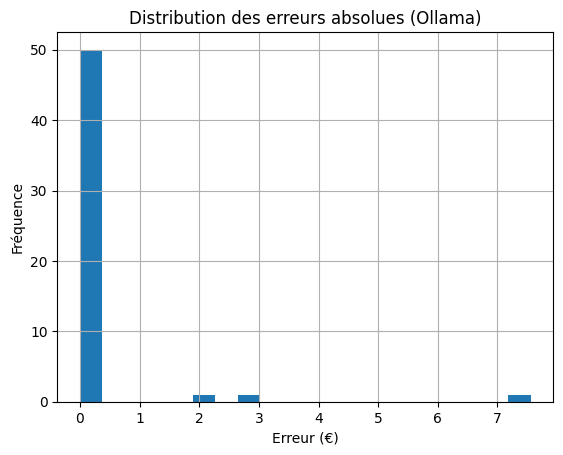

In [ ]:
import matplotlib.pyplot as plt
errors = [abs(r["montant_detecte"] - r["montant_reel"]) for r in liste_resultats_ollama if r["montant_detecte"] is not None]
plt.hist(errors, bins=20)
plt.title("Distribution des erreurs absolues")
plt.xlabel("Erreur (€)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.title("Distribution des erreurs absolues (Ollama)")
plt.show()

# Comparaison des modèles HuggingFace et Ollama

C:\Users\benja\AppData\Local\Temp\ipykernel_25212\43096789.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


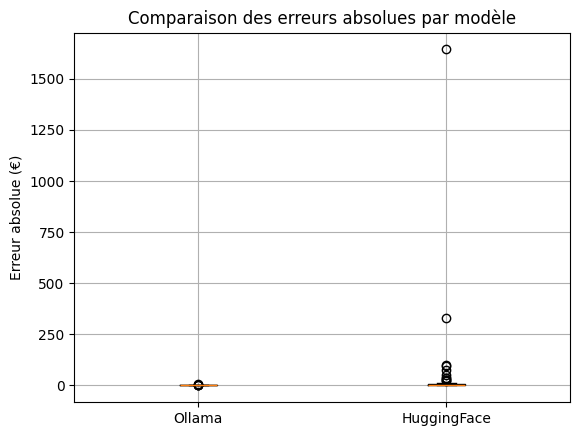

In [ ]:
import matplotlib.pyplot as plt

# Calculer les erreurs absolues pour chaque modèle
errors_ollama = [
    abs(r["montant_detecte"] - r["montant_reel"])
    for r in liste_resultats_ollama
    if r["montant_detecte"] is not None
]

errors_hf = [
    abs(r["montant_detecte"] - r["montant_reel"])
    for r in liste_resultats_hugging
    if r["montant_detecte"] is not None # and r["montant_detecte"] <=4
]

# Tracer le boxplot
plt.boxplot(
    [errors_ollama, errors_hf],
    labels=["Ollama", "HuggingFace"],
    showfliers=True  # affiche aussi les outliers
)

plt.ylabel("Erreur absolue (€)")
plt.title("Comparaison des erreurs absolues par modèle")
plt.grid(True)
plt.show()
